#  Create The Dot Density Map Using Python 🗺️

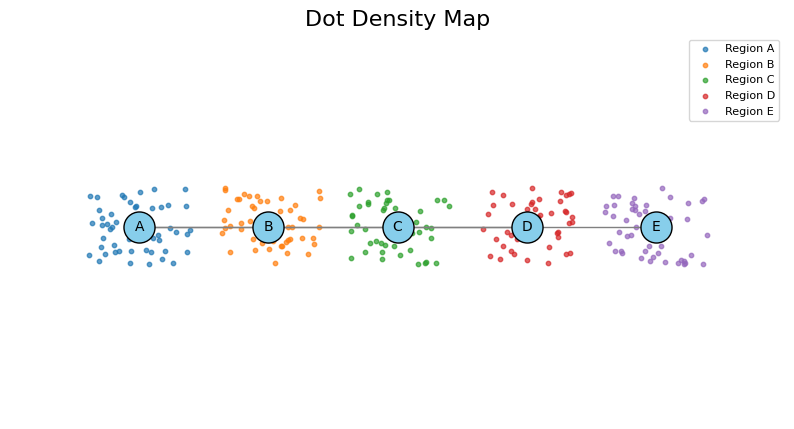

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

# Create a graph
G = nx.Graph()

# Add nodes
nodes = ['A', 'B', 'C', 'D', 'E']
G.add_nodes_from(nodes)

# Add edges
edges = [('A', 'B'), ('A', 'C'), ('B', 'D'), ('C', 'D'), ('D', 'E')]
G.add_edges_from(edges)

# Map nodes to positions along a grid (as regions for dot density)
pos = {node: (i, 0) for i, node in enumerate(nodes)}

# Create data for dot density (random points in each node's "region")
dot_data = {}
dot_count = 50  # Number of dots per region
region_width = 0.8  # Width of the region for each node

for node, center in pos.items():
    x_center, y_center = center
    x_min = x_center - region_width / 2
    x_max = x_center + region_width / 2
    x_dots = np.random.uniform(x_min, x_max, dot_count)
    y_dots = np.random.uniform(-0.2, 0.2, dot_count)  # Spread dots around y=0
    dot_data[node] = (x_dots, y_dots)

# Plot the dot density map
fig, ax = plt.subplots(figsize=(10, 5))

# Plot dots for each node's region
for node, (x_dots, y_dots) in dot_data.items():
    ax.scatter(x_dots, y_dots, s=10, label=f'Region {node}', alpha=0.7)

# Draw the graph nodes and edges for reference
nx.draw_networkx_nodes(G, pos, ax=ax, node_color='skyblue', node_size=500, edgecolors='black')
nx.draw_networkx_labels(G, pos, ax=ax, font_size=10, font_color='black')
nx.draw_networkx_edges(G, pos, ax=ax, edge_color='gray')

# Customize plot
ax.set_xlim(-1, len(nodes))
ax.set_ylim(-1, 1)
ax.axis('off')
plt.title('Dot Density Map', fontsize=16)
plt.legend(loc='upper right', fontsize=8)
plt.show()
